 libraries

In [ ]:
# lib for linear algebra
import numpy as np
import matplotlib.pyplot as plt
# processing
import pandas as pd
# data visualization
# to see data
import seaborn as sns
from sklearn.linear_model import SGDOneClassSVM
from sklearn import preprocessing
# to measure accuracy
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC



 read data 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# use pandas to process data in our dataset
weather_data= pd.read_csv('drive/MyDrive/Colab Notebooks/dataset/weatherAUS.csv')
# to print dataset
weather_data

In [ ]:
weather_data= pd.read_csv('drive/MyDrive/Colab Notebooks/dataset/weatherAUS.csv')
#to illustrate number of columns and rows
print('size of weather data frame is :',weather_data.shape)
print('____________________________________________________________')
#to show more information about dataset
weather_data.info()

after we read dataset we going to prapere data + handling the missing values

finding categorical features




In [ ]:
# Categorical features in Dataset
features1 = [column_name for column_name in weather_data.columns if weather_data[column_name].dtype == 'O']
print("Number of Categorical Features is: {}".format(len(features1)))
print("Categorical Features is: ",features1)

In [ ]:
# Numerical Features in Dataset
features2 = [column_name for column_name in weather_data.columns if weather_data[column_name].dtype != 'O']
print("Number of Numerical Features is: {}".format(len(features2)))
print("Numerical Features is: ",features2)

In [ ]:

weather_data.nunique().plot.bar(figsize=(12,6))
plt.ylabel("number of unique catrgories")
plt.xlabel("variables")
plt.title("cardinality check")
plt.show()

In [ ]:
#Cardinality check
for each_feature in features1:
   value = len(weather_data[each_feature].unique())
   print("Cardinality of {} are: {}".format(each_feature, value))

In [ ]:
#Feature Engineering of Date column to decrease high cardinality
weather_data['Date'] = pd.to_datetime(weather_data['Date'])
weather_data['year'] = weather_data['Date'].dt.year
weather_data['month'] = weather_data['Date'].dt.month
weather_data['day'] = weather_data['Date'].dt.day


In [ ]:
#Drop Date column
weather_data.drop('Date', axis = 1, inplace = True)
weather_data.head()

In [ ]:
# we goint to compute the loss in each these four attribute in percentage 
null_values=[(i,weather_data[i].isna().mean()*100)for i in weather_data]
null=pd.DataFrame(null_values,columns=['column','%'])

In [ ]:
null[null['%']>15].sort_values('%')

In [ ]:
categorical_features = [column_name for column_name in weather_data.columns if weather_data[column_name].dtype == 'O']
weather_data[categorical_features].isnull().sum()


In [ ]:
# Imputing the missing values in categorical features using the most frequent value which is mode
categorical_features_with_null = [feature for feature in categorical_features if weather_data[feature].isnull().sum()]
for each_feature in categorical_features_with_null:
    mode_val = weather_data[each_feature].mode()[0]
    weather_data[each_feature].fillna(mode_val,inplace=True)

In [ ]:
weather_data.head()

In [ ]:
# the null values after Imputing the missing values in categorical features
weather_data[categorical_features].isnull().sum()

In [ ]:
#Handling Missing values in Numerical features
numerical_features = [column_name for column_name in weather_data.columns if weather_data[column_name].dtype != 'O']
weather_data[numerical_features].isnull().sum()

In [ ]:
#If you want to impute the missing values with mean values, then outliers in numerical features need to be addressed properly
# draw boxplots to visualize outliers


plt.figure(figsize=(15,10))


plt.subplot(2, 2, 1)
fig = sns.boxplot(x=weather_data["Rainfall"])
fig.set_title('')
fig.set_ylabel('Rainfall')


plt.subplot(2, 2, 2)
fig = sns.boxplot(x=weather_data["Evaporation"])
fig.set_title('')
fig.set_ylabel('Evaporation')


plt.subplot(2, 2, 3)
fig = sns.boxplot(x=weather_data["WindSpeed9am"])
fig.set_title('')
fig.set_ylabel('WindSpeed9am')


plt.subplot(2, 2, 4)
fig = sns.boxplot(x=weather_data["WindSpeed3pm"])
fig.set_title('')
fig.set_ylabel('WindSpeed3pm')




In [ ]:


plt.figure(figsize=(15,10))

plt.subplot(2, 2, 1)
fig = sns.boxplot(x=weather_data["Pressure9am"])
fig.set_title('')
fig.set_ylabel("Pressure9am")

plt.subplot(2, 2, 2)
fig = sns.boxplot(x=weather_data["Pressure3pm"])
fig.set_title('')
fig.set_ylabel("Pressure3pm")

plt.subplot(2, 2, 3)
fig = sns.boxplot(x=weather_data["Temp9am"])
fig.set_title('')
fig.set_ylabel("Temp9am")

plt.subplot(2, 2, 4)
fig = sns.boxplot(x=weather_data["Temp3pm"])
fig.set_title('')
fig.set_ylabel("Temp3pm")

In [ ]:


plt.figure(figsize=(15,10))

plt.subplot(2, 2, 1)
fig = sns.boxplot(x=weather_data["MinTemp"])
fig.set_title('')
fig.set_ylabel("MinTemp")

plt.subplot(2, 2, 2)
fig = sns.boxplot(x=weather_data["MaxTemp"])
fig.set_title('')
fig.set_ylabel("MaxTemp")

plt.subplot(2, 2, 3)
fig = sns.boxplot(x=weather_data["WindGustSpeed"])
fig.set_title('')
fig.set_ylabel("WindGustSpeed")

plt.subplot(2, 2, 4)
fig = sns.boxplot(x=weather_data["Humidity9am"])
fig.set_title('')
fig.set_ylabel("Humidity9am")


In [ ]:
#the first four attribute have lowest number of valid values we goint to compute the loss in each these four attribute in percentage 
null_values=[(i,weather_data[i].isna().mean()*100)for i in weather_data]
null=pd.DataFrame(null_values,columns=['column','%'])

In [ ]:
null[null['%']>15].sort_values('%')

In [ ]:
# after we find the missing values in Numerical Features can be imputed using Mean and Median
# before should handle the outliers
features_with_outliers = ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'WindGustSpeed','WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm']
for feature in features_with_outliers:
    q1 = weather_data[feature].quantile(0.25)
    q3 = weather_data[feature].quantile(0.75)
    IQR = q3-q1
    lower_limit = q1 - (IQR*1.5)
    upper_limit = q3 + (IQR*1.5)
    weather_data.loc[weather_data[feature]<lower_limit,feature] = lower_limit
    weather_data.loc[weather_data[feature]>upper_limit,feature] = upper_limit

In [ ]:
# now we can hamdel the missing values
numerical_features_with_null = [feature for feature in numerical_features if weather_data[feature].isnull().sum()]
for feature in numerical_features_with_null:
    mean_value = weather_data[feature].mean()
    weather_data[feature].fillna(mean_value,inplace=True)

In [ ]:
#show data frame after handling missing values by mean
weather_data.head()

In [ ]:
#count missing values for each column >> by function isnull()
print('the missing values for each column is :')
print('_____________________________________________')
weather_data.isna().sum()

In [ ]:
#count valid values for each column
print('the valid values for each column is :')
print(weather_data.count().sort_values())

In [ ]:
#the first four attribute have lowest number of valid values we goint to compute the loss in each these four attribute in percentage 
null_values=[(i,weather_data[i].isna().mean()*100)for i in weather_data]
null=pd.DataFrame(null_values,columns=['column','%'])

In [ ]:
null[null['%']>15].sort_values('%')
#now no have any missing values

In [ ]:

#first, we going to drop the attributes that are irrelevant in analysis by "drop function and parameter of function drop"
#Need to specify at least one of 'labels', 'index' or 'columns'
#weather_data=weather_data.drop(columns=['Date','Location'], axis=1)
#weather_data=weather_data.dropna(how='any')

# to show apdate on data set _ can use shape to return number of column and values
#print('size of weather data frame after updated is :',weather_data.shape)

#if we need to drop rows <-- set lables by numbers of instance want to drop from 0 to 145460

In [ ]:
#second, we goint to drop variables that have more missing values from data set
################## no need to eliminate cloud9am becuase have 38.421559 % of missing ??????????

#weather_data=weather_data.drop(columns=['Evaporation','Sunshine','Cloud3pm'], axis=1)
#weather_data=weather_data.dropna(how='any')
#print('size of weather data frame after eliminate the variables contains more missing values is :',weather_data.shape)

In [ ]:
##we going to replacing the missing values in Cloud9am with mean value, because does not have more missing values 
#mean=weather_data['Cloud9am'].mean()
#print('the mean value for Cloud9am is : ',mean)
# fill by using function fillna(), wich is enter new values to each null values
#weather_data['Cloud9am'].fillna(mean,inplace=True)
#print('___________________________________________________________________________________')
# we going to check subset of columns not entire dataframe
#print('the values of missing values in subset of column Cloud9am of is : ',weather_data['Cloud9am'].isnull().sum())
#print('___________________________________________________________________________________')
#weather_data.Cloud9am

In [ ]:
print('result of each column, after handling missing values :')
#weather_data.isnull().
weather_data.isnull().sum().sort_values(ascending=False)
print('___________________________________________________________________')
weather_data.head

In [ ]:
#we going to visualization for target 'RainTomorrow' by using seaborn which is library based on matplotlib 
sns.set()

In [ ]:
#Exploring target variable
# shows count of (0 no rain tomorrow) and (1 rain tomorrow)
sns.countplot('RainTomorrow',data=weather_data)

In [ ]:
#we going to visualization 'RainTomorrow' according RainToday
sns.countplot('RainToday',hue='RainTomorrow',data=weather_data)
#we observe if raintoday '0' then raintomorrow is '0' almost 38000 from 43993 and '1' almost 5800 from 12427
#if raintoday '1' then raintomorrow is '0' almost 5800 from 43993 and '1' almost 5100 from 12427
#which is this logical division corresponds to visualization for RainTomorrow on the above 

In [ ]:
#show relationship between Sunshine and Rainfall
sns.lineplot(data=weather_data,x='Sunshine',y='Rainfall',color='green')

In [ ]:
#show relationship between Sunshine and Evaporation
sns.lineplot(data=weather_data,x='Sunshine',y='Evaporation',color='blue')

Correlation

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(weather_data.corr(), linewidths=0.5, annot=False, fmt=".2f", cmap = 'viridis')

convet string values to numerical values

In [ ]:
# the model to work, we must give it numeric values
# first, we convert data has tow binary variables 'RainToday' and 'RainTomorrow' (yea-no) into quantitative variables (0-1)

# Replace No and Yes for 0 and 1 in RainToday and RainTomorrow by using replace function
weather_data['RainToday'].replace({'No': 0, 'Yes': 1},inplace = True)
weather_data['RainTomorrow'].replace({'No': 0, 'Yes': 1},inplace = True)

#show column after converting
weather_data.RainTomorrow

In [ ]:
#show number of 0's and 1's after converting
weather_data['RainTomorrow'].value_counts()

In [ ]:
#show column after converting
weather_data.RainToday

In [ ]:
#show number of 0's and 1's after converting
weather_data['RainToday'].value_counts()

 Categorical variables

In [ ]:

#Categorical variables WindGustDir, WindDir3pm and WindDir9am 
#each of them Categorical variables with 16 categories, we going to conver each category into additional variable by dummy variables.
# we use dummy because have several Categorical variables not just a binary as raintoday can we use function replace()
categoric_values = ['WindGustDir', 'WindDir3pm', 'WindDir9am','Location']
weather_finaldata = pd.get_dummies(weather_data, columns=categoric_values)
weather_data.RainTomorrow
print('__________________________________________________________________')
display(weather_finaldata.head)

seperating features and target

In [ ]:
#save target column in y
Y = weather_finaldata['RainTomorrow']
#drop target column, then x it is contain only the all features 
# x is featurs that we going to build model over it
X = weather_finaldata.drop(columns=['RainTomorrow'],axis=1)
print('______________________________________________________________________')
print('value of y is : \n',Y)
print('______________________________________________________________________')

In [ ]:
print('______________________________________________________________________')
print('values of x is \n:',X)
print('______________________________________________________________________')

In [ ]:
# split x,y into test and train by sklearn.model_selection and give train_test_split x,y and the percentage given to each train and test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.10, random_state=2)

print('total x', X.shape)
print('X train shape: ', X_train.shape)
print('X test shape: ', X_test.shape) 

print('___________________________________________ \n')

print('total y', Y.shape)
print('Y train shape: ', Y_train.shape)
print('Y test shape: ', Y_test.shape)

#then give x,y to the model 
# build model by x train and y train 
# and test model by x test and y test ??

# take 5642 for test from total x 56420 -- and take 50778 for train from 56420
# take from total y 56420 -- 50778 for training and 5642 for test

In [ ]:
#from sklearn.ensemble import ExtraTreesRegressor
#etr_model = ExtraTreesRegressor()
#etr_model.fit(X,Y)
#etr_model.feature_importances_

In [ ]:
#feature_imp = pd.Series(etr_model.feature_importances_,index=X.columns)
#feature_imp.nlargest(10).plot(kind='barh')

build the SVM model 

In [ ]:
# define the SVM model
# We train model on X_train and his result Y_train
#svmcla = SVC()
#svmcla.fit(X_train, Y_train)

#Import svm model
from sklearn.svm import SVC
#Create a svm Classifier
svmcla = SVC(kernel = 'linear', random_state =0)
#Train the model using the training sets only
svmcla.fit(X_train, Y_train)


SVC(kernel='linear', random_state=0)

model evaluation

In [ ]:
#We predict result of X_train by the model 
# run the model on same data for built, which means on X_train not x_test
Y_predict2 = svmcla.predict(X_train)
print(Y_predict2)

[0 0 0 ... 1 0 0]


In [ ]:
#check accuracy on training data by accuracy_score function 
#give the function real result y_train and result that our model is predicted Y_predict2 to compare between them to determine the accuracy
# accuracy may be high because we predict same values that model built over it

accuracy= accuracy_score(Y_train,Y_predict2)
print('the accuracy on seen data is : ',accuracy)

the accuracy on seen data is :  0.8486028996134867


In [ ]:
# We predict values for X_test by svm model 
# which is the target values is x_test --> 5642 .. the model is not built on these values 

Y_predict2 = svmcla.predict(X_test)
print(Y_predict2)

[0 0 0 ... 0 1 0]


In [ ]:
# check accuracy on test data
#give the function unseen data

accuracy= accuracy_score(Y_test,Y_predict2)
print('the accuracy on unseen data is : ',accuracy)

the accuracy on unseen data is :  0.8453183005637288


For further evaluation apply some metrics

the confusion matrix is : 
  [[10780   580]
 [ 1670  1516]]


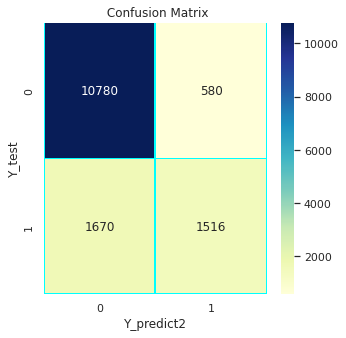

In [ ]:
# apply confusion matrix
confusion=metrics.confusion_matrix(Y_test, Y_predict2)
print('the confusion matrix is : \n ',confusion)
#to show confusion matrix
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(confusion, annot=True, linewidth=0.7, linecolor='cyan', fmt='g', ax=ax, cmap="YlGnBu")
plt.title(' Confusion Matrix')
plt.xlabel('Y_predict2')
plt.ylabel('Y_test')
plt.show()

In [ ]:
recall=metrics.recall_score(Y_test, Y_predict2)
print('the recall score is : \n ',recall)

the recall score is : 
  0.4758317639673572


In [ ]:
precision=metrics.precision_score(Y_test, Y_predict2)
print('the precision score is : \n ',precision)

the precision score is : 
  0.7232824427480916


In [ ]:
f1=metrics.f1_score(Y_test, Y_predict2)
print('the f1 score is : \n ',f1)

the f1 score is : 
  0.5740249905338888


In [ ]:
report=metrics.classification_report(Y_test, Y_predict2)
print('give whole report of the model \n:',report)

give whole report of the model 
:               precision    recall  f1-score   support

           0       0.87      0.95      0.91     11360
           1       0.72      0.48      0.57      3186

    accuracy                           0.85     14546
   macro avg       0.79      0.71      0.74     14546
weighted avg       0.83      0.85      0.83     14546



show if have overfitting and underfitting

In [ ]:
print("Train Data Score: {}".format(svmcla.score(X_train, Y_train)))
print("Test Data Score: {}".format(svmcla.score(X_test, Y_test)))

Train Data Score: 0.8486028996134867
Test Data Score: 0.8453183005637288


Cross-Validation and ROC

In [ ]:
 from sklearn.metrics import plot_confusion_matrix, plot_roc_curve, classification_report

[0. 0. 1.]
[0. 1. 1.]
[1.6 0.6 0.1]


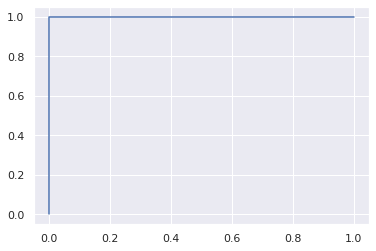

In [ ]:

Y_true = [1,0,0]
Y_predict = [.6,.1,.1]

fpr, tpr, thresholds = metrics.roc_curve(Y_true, Y_predict , pos_label=1)

print(fpr)
print(tpr)
print(thresholds)

# Print ROC curve
plt.plot(fpr,tpr)
plt.show()

    #print('ROC Curve')
   # print('-'*53)
   # roc_curve_custom(model, X_test, y_test)
    #print('\n')


In [ ]:
# Cross-Validation
from sklearn.model_selection import cross_val_score
scores = cross_val_score(svmcla, X_train, Y_train, cv = 5, scoring='accuracy')
print('Cross-validation scores:{}'.format(scores))
print('Average cross-validation score: {}'.format(scores.mean()))

NameError: ignored